In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns

#IMPORTING FUNCTIONS FOR CLASSIFIERS
from sklearn.preprocessing import StandardScaler

#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_

In [10]:
# IMPORT FOR SINGLE DATABASE FILE
### SETTING PATH TO THE FILES WITH CORRECT ALIAS

samples = 1024;

df_full = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_both_final', index_col=0, dtype='unicode');

df_simples = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_both_simples', index_col=0, dtype='unicode');

path_single_1 = [
    "./database_raw/Dataset A/zzzAD1.txt"
];
path_single_30 = [
    "./database_raw/Dataset A/zzzAD30.txt"
];
path_single_0 = [
    "./database_raw/Dataset A/zzzAU.txt"
];
path_single_12 = [
    "./database_raw/Dataset A/zzzAD12.txt"
];

# df_single_1 = defs_.initDatabase(path_single_1);
# df_single_1 = df_single_1.astype(float);

#df_single_30 = defs_.initDatabase(path_single_30);
#df_single_30 = df_single_30.astype(float);

# df_single_0 = defs_.initDatabase(path_single_0);
# df_single_0 = df_single_0.astype(float);

# df_single_12 = defs_.initDatabase(path_single_12);
# df_single_12 = df_single_12.astype(float);

df_simples

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,f*s_mean_S1,f*s_max_S1,f*s_sum_S1,...,f*s_sum_S30,high_freq_S30,low_freq_S30,mean_S30,std_S30,median_S30,skew_S30,amp_max_min_S30,kurtosis_S30,Scenario
0,0.0007781732421875,0.10603555506398436,0.00020750597859879523,0.00016167695106839307,3.027767974283028e-07,1.7680131837389394e-05,3.459908383050762e-08,0.053121666512757876,0.39764754473552705,13871.182681477849,...,13385.514565316656,365.0009344023921,0.00273971901369863,-0.0009625774402050785,0.14051081616489033,-0.00160728,-0.028261960420297376,0.9763257999999999,0.3741716150735144,1
1,0.0008467341796875,0.13023888669609376,0.000254870619757522,0.00018445991267254926,3.584793855255318e-07,2.529053775678008e-05,4.9492246099373935e-08,0.06521766114573235,0.43248741145997843,17029.700896034778,...,13010.161882121558,399.82088024564996,0.00250112,-0.0007408178286132816,0.13220517439369525,0.0031077394999999997,-0.13960095714872756,0.8766658,-0.19597598823181217,1
2,0.001176632421875,0.12327197006771484,0.0002412367320307531,0.0001890431227999188,6.922319281037139e-07,2.3999744337079164e-05,4.696623157941128e-08,0.0617289488307966,0.6009899240921317,16118.724847646437,...,13829.263648311005,61.97223643807574,0.01613625806451613,-0.0010596247472656256,0.14178383623011304,-0.003839492,0.15268936763001495,0.8964205000000001,0.019830716117583247,1
3,0.0012122330078125,0.1757829419080078,0.0003439979293698783,0.00024472774799294946,7.347544326150705e-07,4.553680586538265e-05,8.911312302423219e-08,0.08802403515094125,0.6191736771848088,22984.92408264893,...,18246.993570585375,447.79938587512794,0.002233142857142857,-0.0006096456118164065,0.16496941710744412,-0.0008257963500000001,-0.03433807485017546,1.0781062000000001,-0.09253528403808797,1
4,0.00139026171875,0.16444245279882813,0.0003218051913871392,0.00023980974147593974,9.664138233108518e-07,4.115269344082516e-05,8.053364665523515e-08,0.08234523832833655,0.7101056109675364,21502.07097753357,...,15276.911632174782,114.94850307062435,0.008699547826086958,-0.0008355930417968758,0.1391090713471743,0.005240619,-0.10385369203581078,1.0376701,0.058457058525502426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.0010174564453125,0.15082474249876954,0.0002951560518566919,0.00022261285064018418,5.17608809053974e-07,3.492009872364257e-05,6.833678810888956e-08,0.07378901296417295,0.5077346128463744,19267.860854217804,...,15653.785313898728,405.2734375,0.0024674698795180724,0.0022268341846679663,0.1463088548130687,0.004260801,-0.06072306121432907,0.9396711,-0.07285194834540976,0
1020,0.000901896875,0.13406956425917968,0.00026236705334477435,0.00019337784726412683,4.067089865673828e-07,2.714213866704521e-05,5.311573124666382e-08,0.06559176333619357,0.4500676788330078,17127.386834110202,...,14410.321273549074,202.1484375,0.0049468599033816426,0.0016730884660156261,0.1432019711880003,0.009320239000000001,-0.0628559234161243,1.0328667,0.23811567861600835,0
1021,0.0013240921875,0.13888234787558593,0.0002717854165862738,0.00020265458940192055,8.766100604992674e-07,2.9366197892669353e-05,5.746809763731772e-08,0.06794635414656847,0.6607530349731445,17742.219941106105,...,16386.130810058105,250.0,0.004,0.001823433908984375,0.15540852807998115,0.005102217500000001,0.12789408137547786,1.0024451,-0.11665106960237459,0
1022,0.001221470703125,0.14190300879804688,0.00027769669040713675,0.0002164993447214097,7.459953392963409e-07,3.167878533167256e-05,6.199370906393848e-08,0.06942417260178421,0.6095425090789794,18128.109373950494,...,14601.659228655762,295.8984375,0.0033795379537953796,0.001275242775927735,0.1362552667126023,-5.1783374999999994e-05,0.02412409924378543,0.8374804,-0.05377166902358077,0


In [49]:
df_1 = df_simples.loc[df_simples['Scenario'] == '1'];
# Setting other variables
X_new_attemp = df_1.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_1 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_0 = df_simples.loc[df_simples['Scenario'] == '0'];
# Setting other variables
X_new_attemp = df_0.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_0 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_30 = df_simples.loc[df_simples['Scenario'] == '30'];
# Setting other variables
X_new_attemp = df_30.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_30 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_12 = df_simples.loc[df_simples['Scenario'] == '12'];
# Setting other variables
X_new_attemp = df_12.drop(columns=['Scenario']);
X_new_attemp = X_new_attemp.astype(float);
#Scale df
std_scaler = StandardScaler()
df_12 = pd.DataFrame(std_scaler.fit_transform(X_new_attemp), columns=X_new_attemp.columns, index=X_new_attemp.index);

df_1

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,f*s_mean_S1,f*s_max_S1,f*s_sum_S1,...,f*s_max_S30,f*s_sum_S30,high_freq_S30,low_freq_S30,mean_S30,std_S30,median_S30,skew_S30,amp_max_min_S30,kurtosis_S30
0,-2.292322,-2.780597,-2.780597,-2.480068,-1.928494,-2.380260,-2.380260,-2.650308,-2.199363,-2.650308,...,0.479541,-1.456758,0.780746,-0.271007,-1.167671,-0.810780,-0.393553,-0.521257,0.218188,2.332266
1,-1.818338,-0.892843,-0.892843,-1.274374,-1.596392,-1.020936,-1.020936,-0.736869,-1.722337,-0.736869,...,-0.992404,-1.762096,1.014916,-0.275946,-0.898662,-1.704187,1.051827,-1.959901,-0.860455,-1.124932
2,0.462356,-1.436232,-1.436232,-1.031827,0.393460,-1.251489,-1.251489,-1.288741,0.584790,-1.288741,...,-1.074042,-1.095782,-1.257170,0.006338,-1.285396,-0.673846,-1.077833,1.816869,-0.646646,0.183653
3,0.708475,2.659393,2.659393,1.915051,0.646982,2.595330,2.595330,2.870822,0.833761,2.870822,...,1.295923,2.497904,1.337579,-0.281494,-0.739541,1.820140,-0.153991,-0.599768,1.319780,-0.497699
4,1.939245,1.774885,1.774885,1.654786,2.028148,1.812267,1.812267,1.972506,2.078796,1.972506,...,1.227119,0.081835,-0.900896,-0.147622,-1.013631,-0.961561,1.705658,-1.498000,0.882131,0.417871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.782166,-0.556912,-0.556912,-0.996969,-0.772787,-0.732115,-0.732115,-0.640823,-0.834460,-0.640823,...,-0.298812,0.688517,-0.018924,-0.243601,2.632035,0.546052,0.587868,0.586948,-0.112627,-0.182127
252,-0.684719,-1.021992,-1.021992,-0.630094,-0.688441,-0.884105,-0.884105,-1.102300,-0.738151,-1.102300,...,-2.013807,-1.109978,0.066454,-0.247728,2.375640,-1.690819,0.209639,-0.489201,-1.433449,-1.008943
253,-1.971543,-1.992404,-1.992404,-2.367582,-1.706801,-1.956292,-1.956292,-2.065193,-2.009949,-2.065193,...,-0.447309,-1.753100,-0.504922,-0.208627,3.101538,-2.253910,-1.199647,1.128211,-1.324649,0.280309
254,0.470726,0.550594,0.550594,0.475066,0.401958,0.487838,0.487838,0.458102,0.403802,0.458102,...,-0.198670,-1.501577,-1.555728,0.850030,2.169401,-0.799124,0.263376,1.356356,-0.954944,0.409665


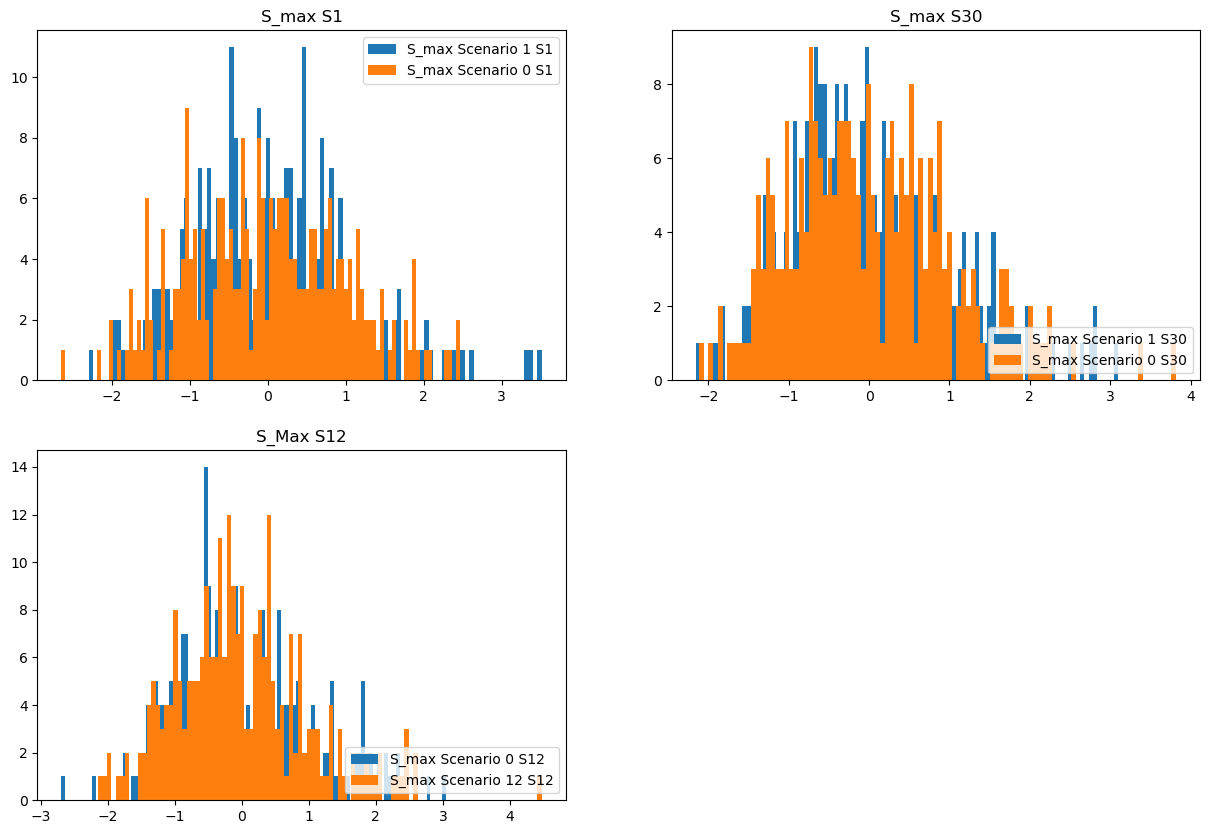

In [61]:
## Plotting caracteristics S_max
propertyLabel = 'S_max';
propertyvalue = 's_max_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title("S_Max S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

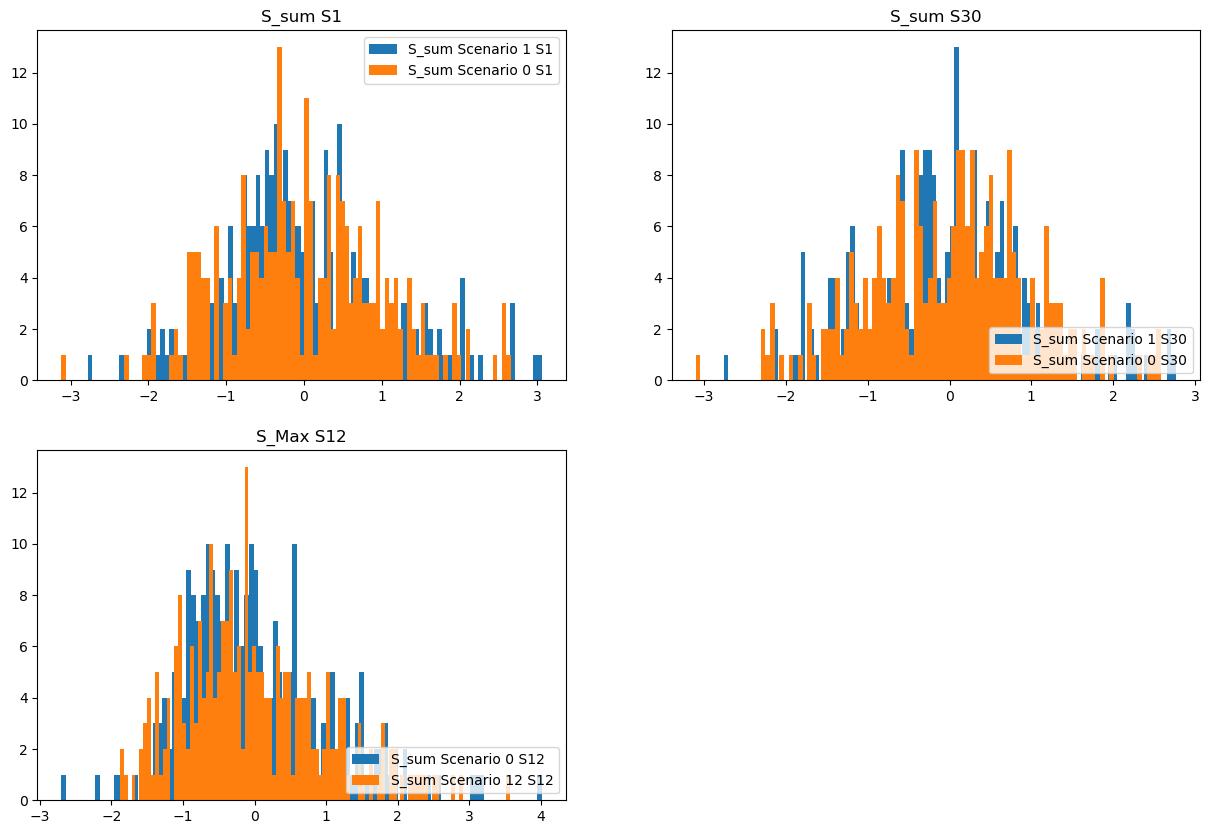

In [62]:
## Plotting caracteristics S_sum
propertyLabel = 'S_sum';
propertyvalue = 's_sum_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title("S_Max S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

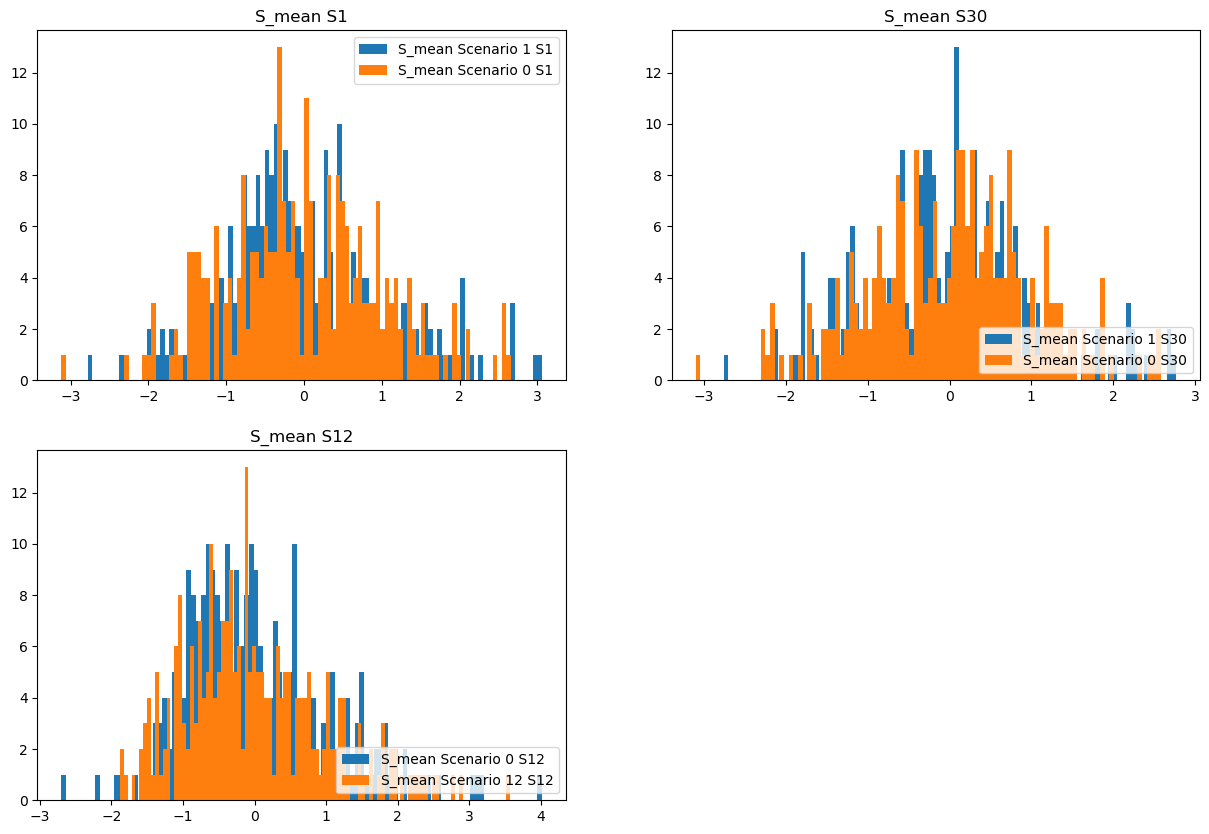

In [63]:
## Plotting caracteristics S_mean
propertyLabel = 'S_mean';
propertyvalue = 's_mean_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

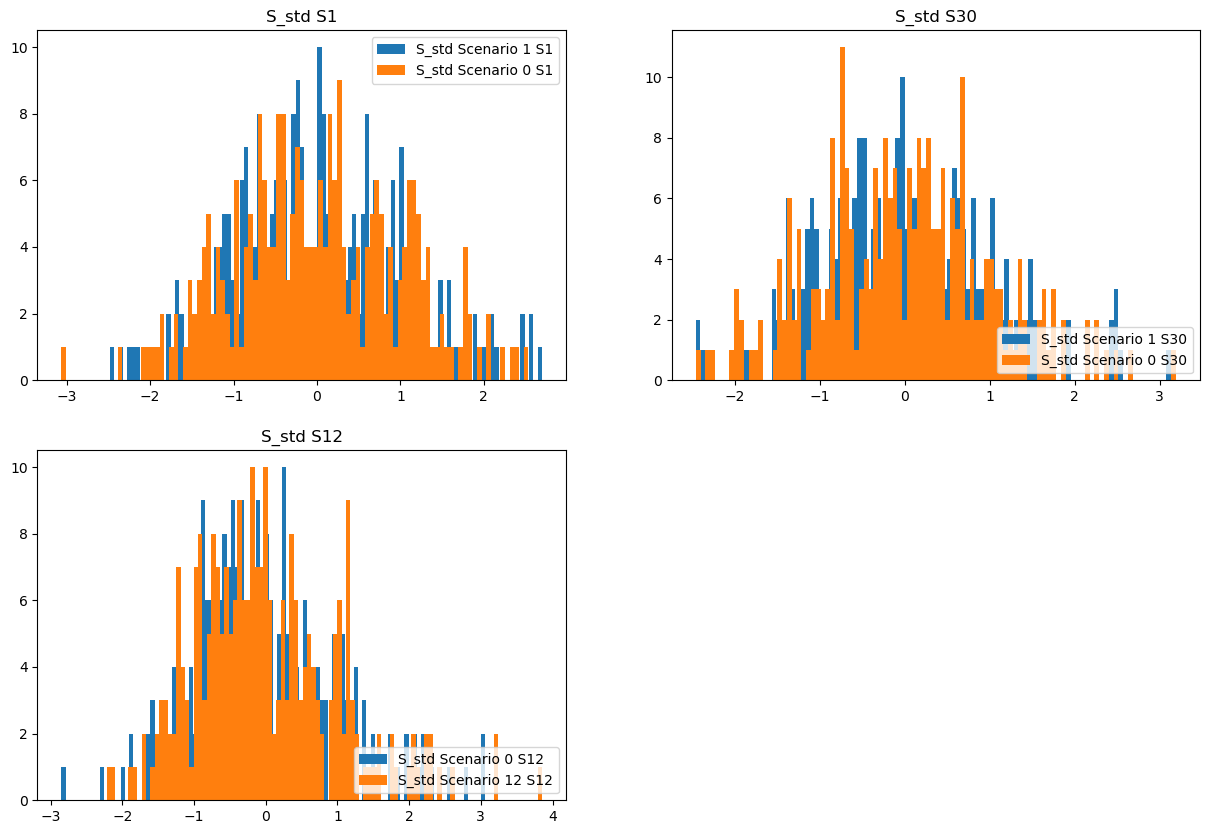

In [64]:
## Plotting caracteristics S_std
propertyLabel = 'S_std';
propertyvalue = 's_std_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

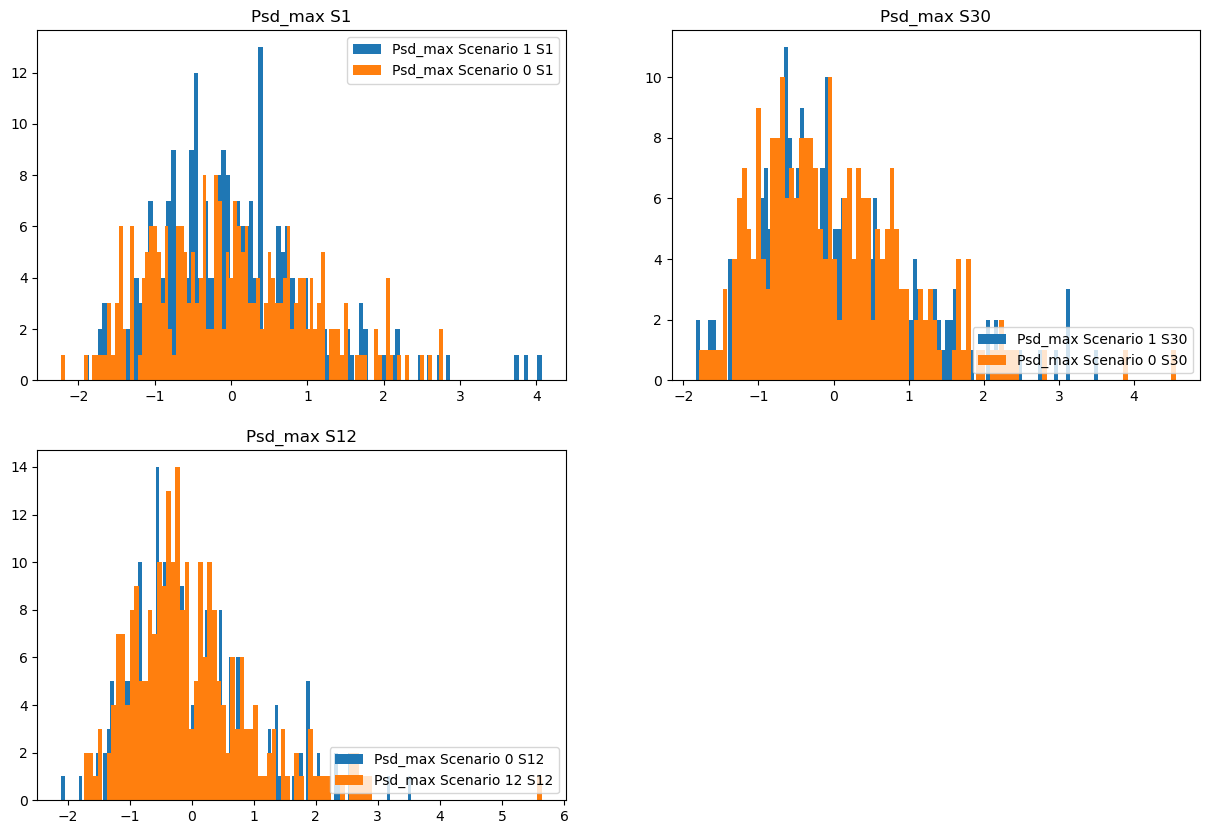

In [65]:
## Plotting caracteristics Psd_max
propertyLabel = 'Psd_max';
propertyvalue = 'psd_max_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

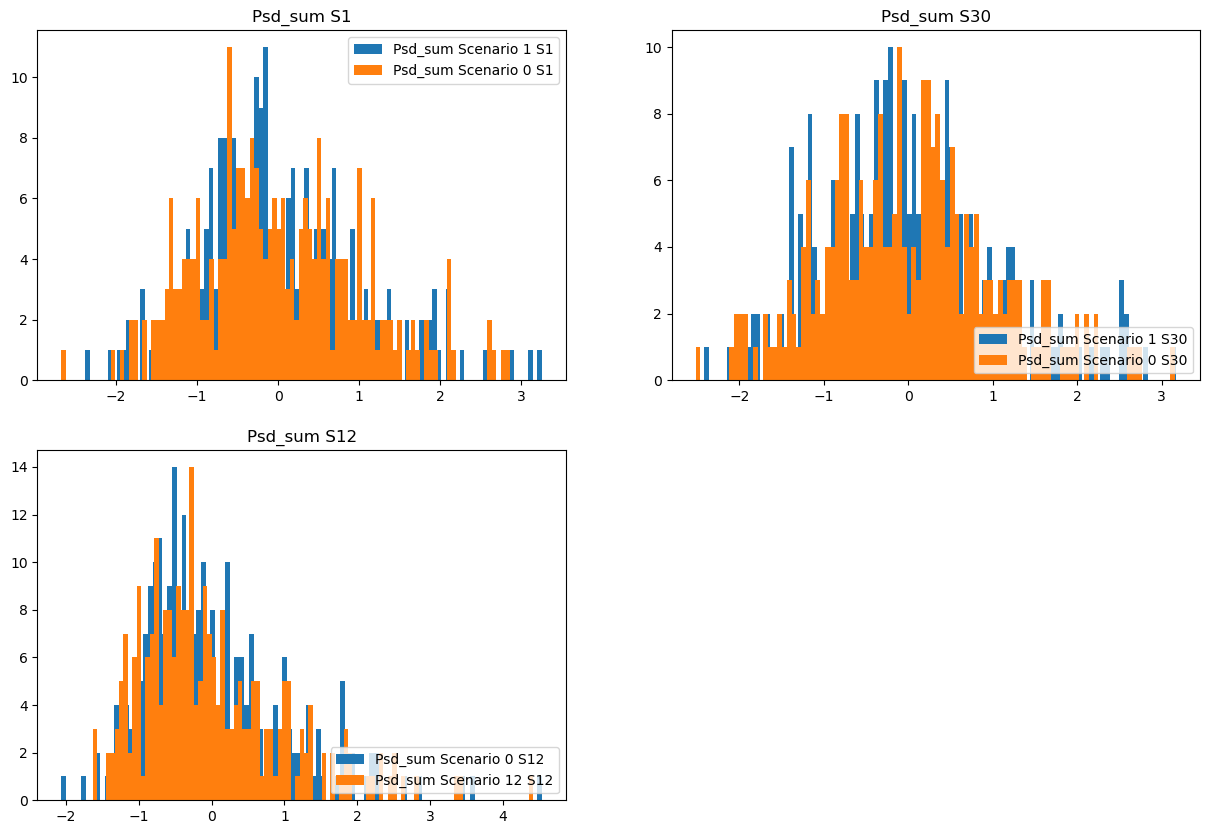

In [67]:
## Plotting caracteristics Psd_sum
propertyLabel = 'Psd_sum';
propertyvalue = 'psd_sum_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

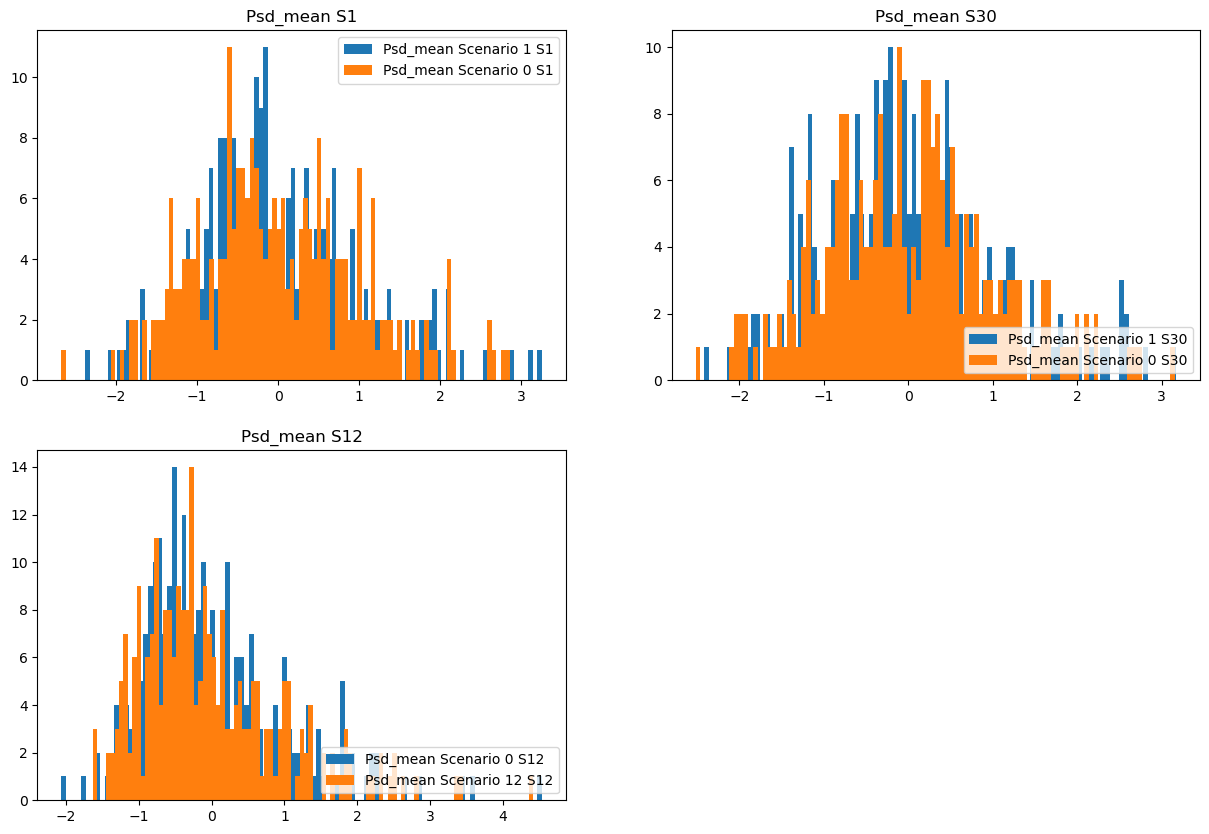

In [68]:
## Plotting caracteristics Psd_mean
propertyLabel = 'Psd_mean';
propertyvalue = 'psd_mean_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

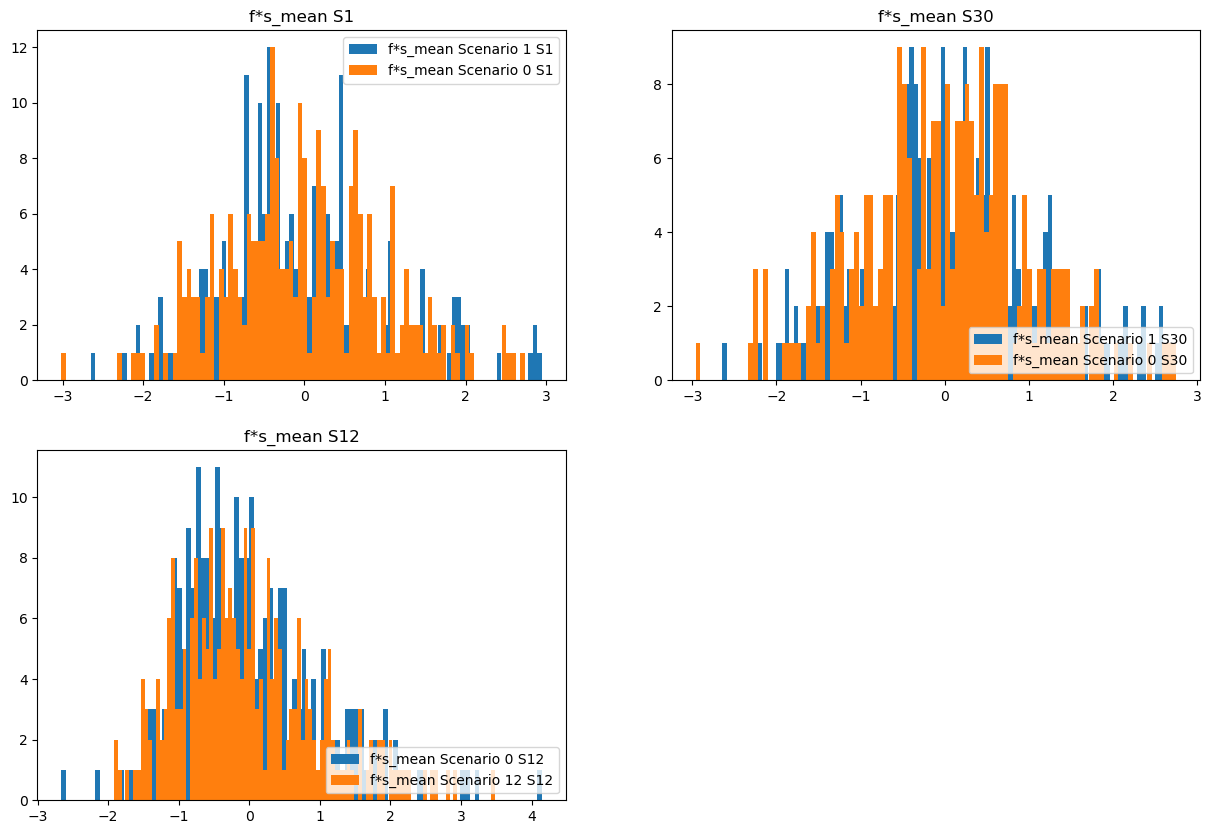

In [71]:
## Plotting caracteristics f*s_mean
propertyLabel = 'f*s_mean';
propertyvalue = 'f*s_mean_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

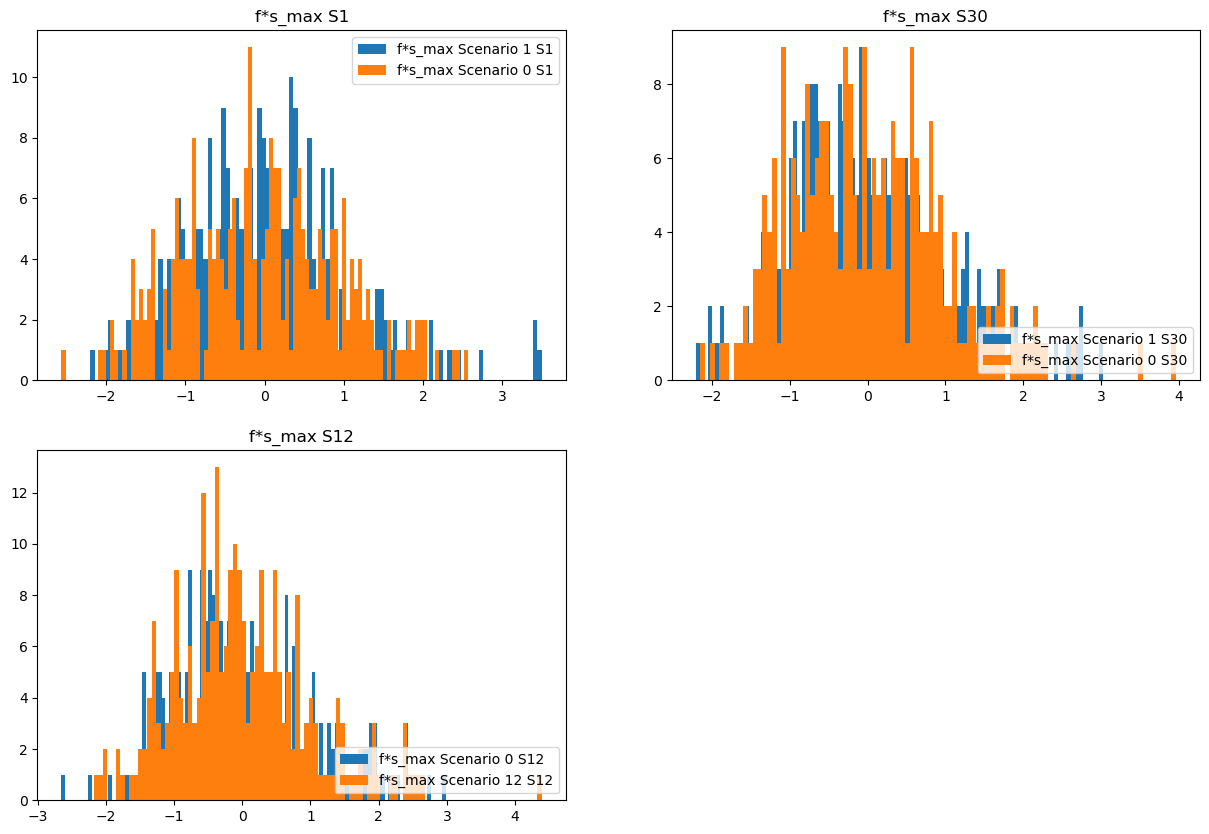

In [72]:
## Plotting caracteristics f*s_max
propertyLabel = 'f*s_max';
propertyvalue = 'f*s_max_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

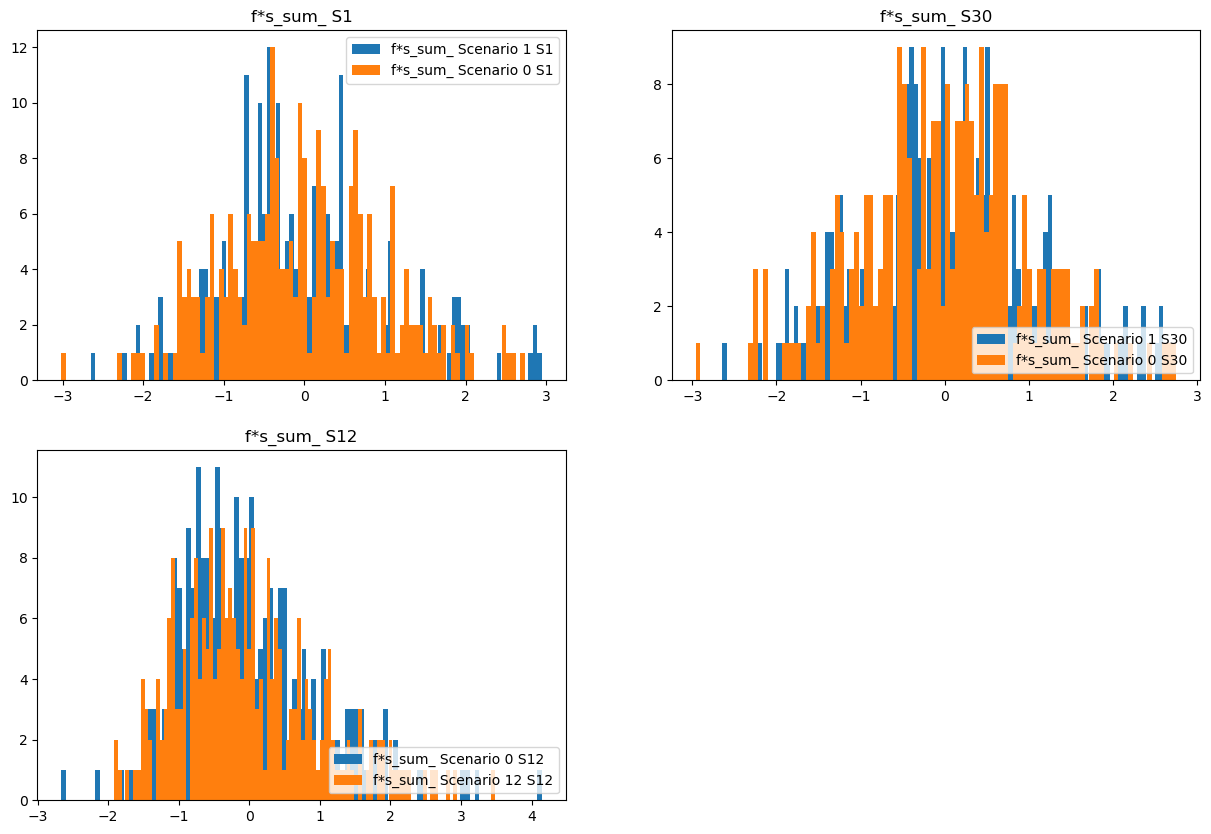

In [74]:
## Plotting caracteristics f*s_sum
propertyLabel = 'f*s_sum_';
propertyvalue = 'f*s_sum_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

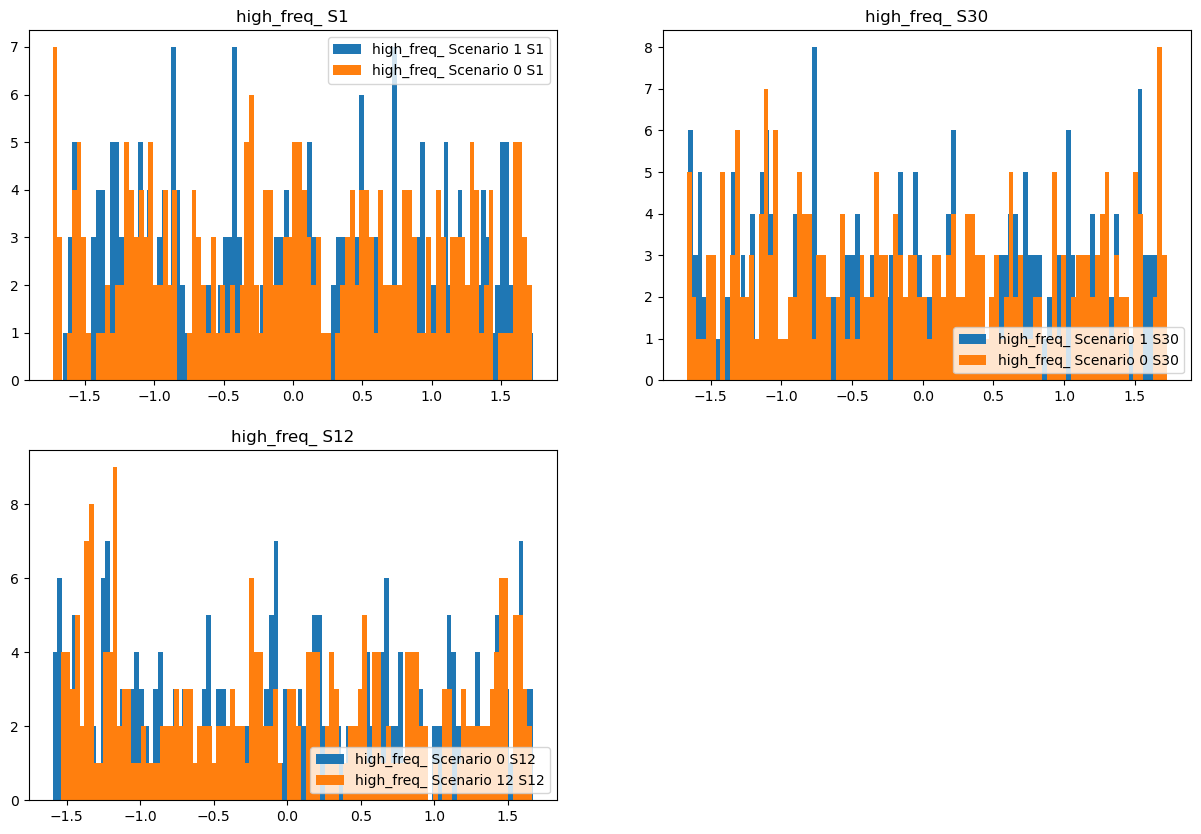

In [75]:
## Plotting caracteristics high_freq
propertyLabel = 'high_freq_';
propertyvalue = 'high_freq_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=100, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=100, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=100, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=100, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=100, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=100, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

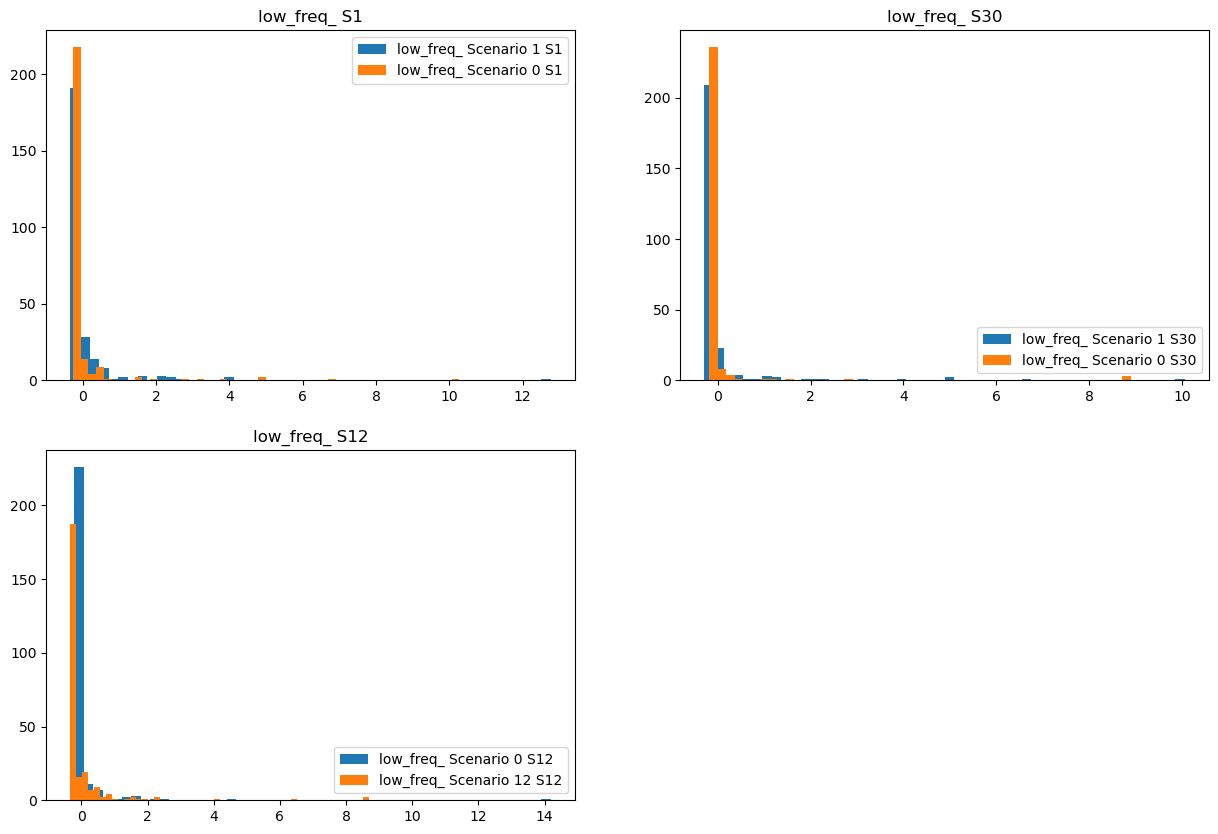

In [77]:
## Plotting caracteristics low_freq
propertyLabel = 'low_freq_';
propertyvalue = 'low_freq_';

axis = df_1[propertyvalue + 'S1'].astype(float);
axis30 = df_1[propertyvalue + 'S30'].astype(float);
axis0 = df_0[propertyvalue + 'S1'].astype(float);
axis030 = df_0[propertyvalue + 'S30'].astype(float);

axis012 = df_0[propertyvalue + 'S12'].astype(float);
axis1212 = df_12[propertyvalue + 'S12'].astype(float);
axis121 = df_12[propertyvalue + 'S1'].astype(float);

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)

axis

plt.title(propertyLabel + ' S1')
plt.hist(axis, bins=50, label= propertyLabel + " Scenario 1 S1")
plt.hist(axis0, bins=50, label= propertyLabel + " Scenario 0 S1")

# plt.ylim([0,0.35])

plt.legend([ propertyLabel + " Scenario 1 S1", propertyLabel + " Scenario 0 S1"], loc ="upper right")

plt.subplot(2,2,2)

plt.title(propertyLabel + " S30")
plt.hist(axis30, bins=50, label = propertyLabel + " Scenario 1 S30")
plt.hist(axis030, bins=50, label = propertyLabel + " Scenario 0 S30")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 1 S30", propertyLabel + " Scenario 0 S30"], loc ="lower right")

plt.subplot(2,2,3)

plt.title(propertyLabel + " S12")
plt.hist(axis012, bins=50, label = propertyLabel + " Scenario 0 S12")
plt.hist(axis1212, bins=50, label = propertyLabel + " Scenario 12 S12")

# # plt.ylim([0,0.35])

plt.legend([propertyLabel + " Scenario 0 S12", propertyLabel + " Scenario 12 S12"], loc ="lower right")

In [16]:
## A kurtosi mede o grau de o grau de picos e achatamentos em relação a distribuição deles, 
## menor kurtosi maior o achatamento e há maior distribuição dos dados, reduz a concentração dos dados. Pode indicar vibração em amplitudes menores (frequencias naturais)
## O dano aparenta estar se fazendo presente nos dados em ambos os sensores porém para o sensor mais distante da localização do dano esta ocorrendo uma concentração desses dados, uma kurtosi maior 

In [91]:
df_1_S1 = defs_.createDatabaseSingleSensor(df_simples.loc[df_simples['Scenario'] == '1'],1);
df_1_S1 = df_1_S1.drop(columns=['damaged']).astype(float);
df_1_S1 

,s_max_S1,s_sum_S1,s_mean_S1,s_std_S1,psd_max_S1,psd_sum_S1,psd_mean_S1,f*s_mean_S1,f*s_max_S1,f*s_sum_S1,high_freq_S1,low_freq_S1,mean_S1,std_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1
0,0.000778,0.106036,0.000208,0.000162,3.027768e-07,0.000018,3.459908e-08,0.053122,0.397648,13871.182681,376.000963,0.002660,-0.001358,0.143538,-0.002283,0.015408,0.993947,0.103656
1,0.000847,0.130239,0.000255,0.000184,3.584794e-07,0.000025,4.949225e-08,0.065218,0.432487,17029.700896,185.916709,0.005379,-0.000405,0.159932,0.001573,-0.031585,0.930550,-0.101231
2,0.001177,0.123272,0.000241,0.000189,6.922319e-07,0.000024,4.696623e-08,0.061729,0.600990,16118.724848,121.945368,0.008200,0.002315,0.177150,0.002927,-0.003201,1.337910,0.478070
3,0.001212,0.175783,0.000344,0.000245,7.347544e-07,0.000046,8.911312e-08,0.088024,0.619174,22984.924083,509.771622,0.001962,0.002870,0.221392,0.007315,0.045592,1.307263,-0.361960
4,0.001390,0.164442,0.000322,0.000240,9.664138e-07,0.000041,8.053365e-08,0.082345,0.710106,21502.070978,184.917157,0.005408,0.001293,0.183528,0.006328,-0.133435,1.341857,0.338595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000997,0.134546,0.000263,0.000190,4.966204e-07,0.000027,5.265665e-08,0.065825,0.497334,17188.244343,217.773438,0.004592,0.004145,0.171602,0.008804,0.000720,0.997111,-0.144618
252,0.001011,0.128583,0.000252,0.000197,5.107675e-07,0.000026,5.099141e-08,0.062908,0.504368,16426.482764,322.265625,0.003103,0.005604,0.158816,0.011559,-0.059467,0.989275,-0.033417
253,0.000825,0.116141,0.000227,0.000164,3.399607e-07,0.000020,3.924421e-08,0.056821,0.411481,14837.033193,65.429688,0.015284,0.003746,0.151790,0.006686,-0.025000,0.855456,-0.281179
254,0.001178,0.148746,0.000291,0.000218,6.936573e-07,0.000034,6.602281e-08,0.072772,0.587771,19002.241877,192.382812,0.005198,0.001972,0.178260,-0.002544,0.095663,1.143121,0.018956


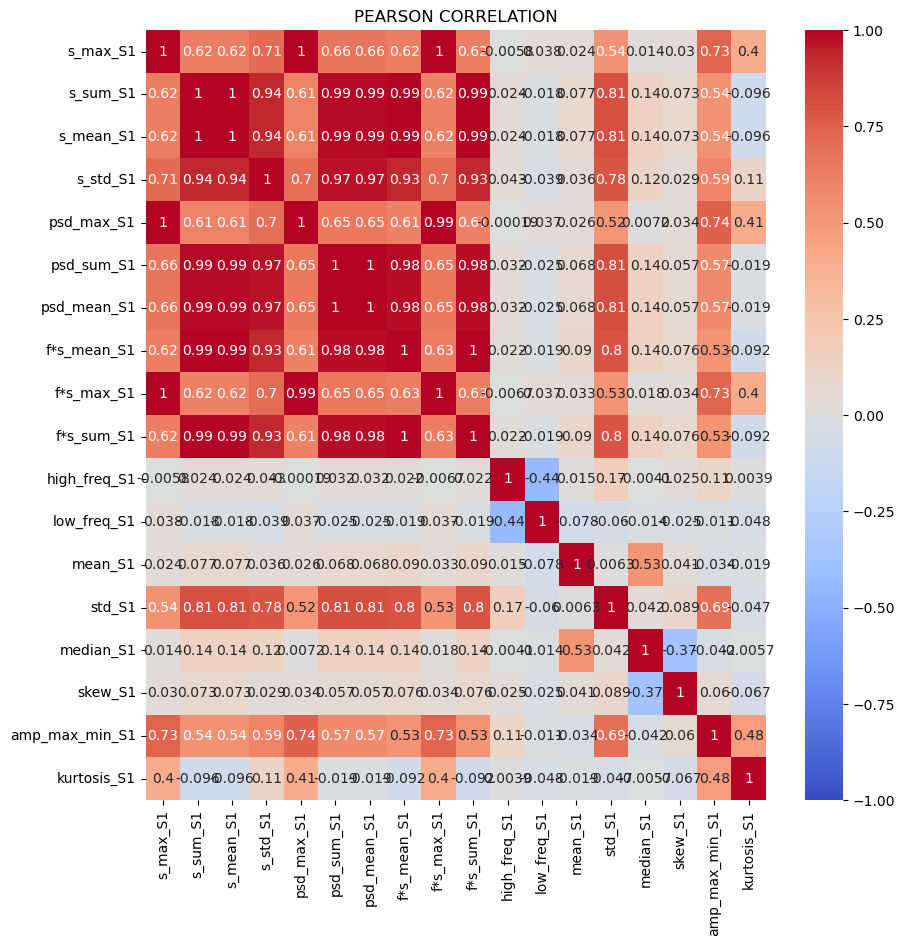

In [92]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,10))
plt.title("PEARSON CORRELATION")
sns.heatmap(df_1_S1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

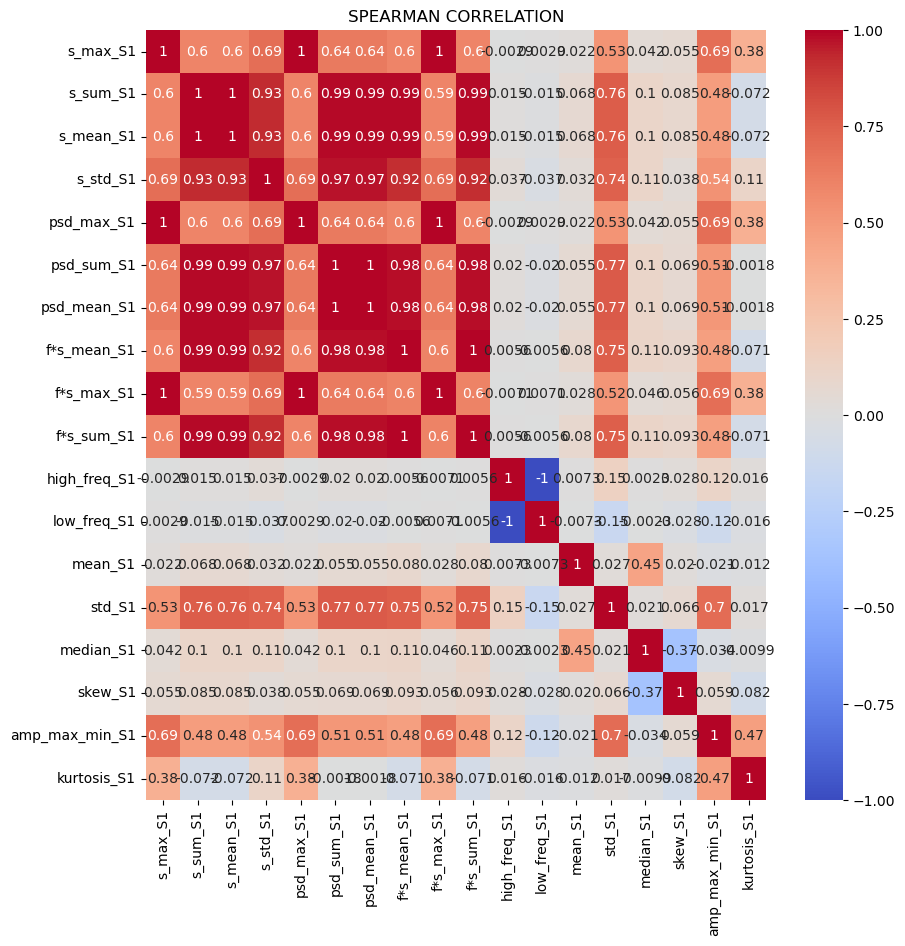

In [93]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS
plt.figure(figsize=(10,10))
plt.title("SPEARMAN CORRELATION")
sns.heatmap(df_1_S1.corr(method= 'spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [105]:
df_1_S1_clean = defs_.createDatabaseSingleSensor(df_simples.loc[df_simples['Scenario'] == '1'],1);
variation = 'S1';
df_1_S1_clean = df_1_S1_clean.drop(columns=['s_sum_'+variation,'psd_sum_'+variation,'f*s_sum_'+variation,'s_mean_'+variation,'psd_max_'+variation,'std_'+variation,'s_std_'+variation,'f*s_mean_'+variation,'f*s_max_'+variation]);
df_1_S1_clean = df_1_S1_clean.drop(columns=['damaged']).astype(float);
df_1_S1_clean

,s_max_S1,psd_mean_S1,high_freq_S1,low_freq_S1,mean_S1,median_S1,skew_S1,amp_max_min_S1,kurtosis_S1
0,0.000778,3.459908e-08,376.000963,0.002660,-0.001358,-0.002283,0.015408,0.993947,0.103656
1,0.000847,4.949225e-08,185.916709,0.005379,-0.000405,0.001573,-0.031585,0.930550,-0.101231
2,0.001177,4.696623e-08,121.945368,0.008200,0.002315,0.002927,-0.003201,1.337910,0.478070
3,0.001212,8.911312e-08,509.771622,0.001962,0.002870,0.007315,0.045592,1.307263,-0.361960
4,0.001390,8.053365e-08,184.917157,0.005408,0.001293,0.006328,-0.133435,1.341857,0.338595
...,...,...,...,...,...,...,...,...,...
251,0.000997,5.265665e-08,217.773438,0.004592,0.004145,0.008804,0.000720,0.997111,-0.144618
252,0.001011,5.099141e-08,322.265625,0.003103,0.005604,0.011559,-0.059467,0.989275,-0.033417
253,0.000825,3.924421e-08,65.429688,0.015284,0.003746,0.006686,-0.025000,0.855456,-0.281179
254,0.001178,6.602281e-08,192.382812,0.005198,0.001972,-0.002544,0.095663,1.143121,0.018956


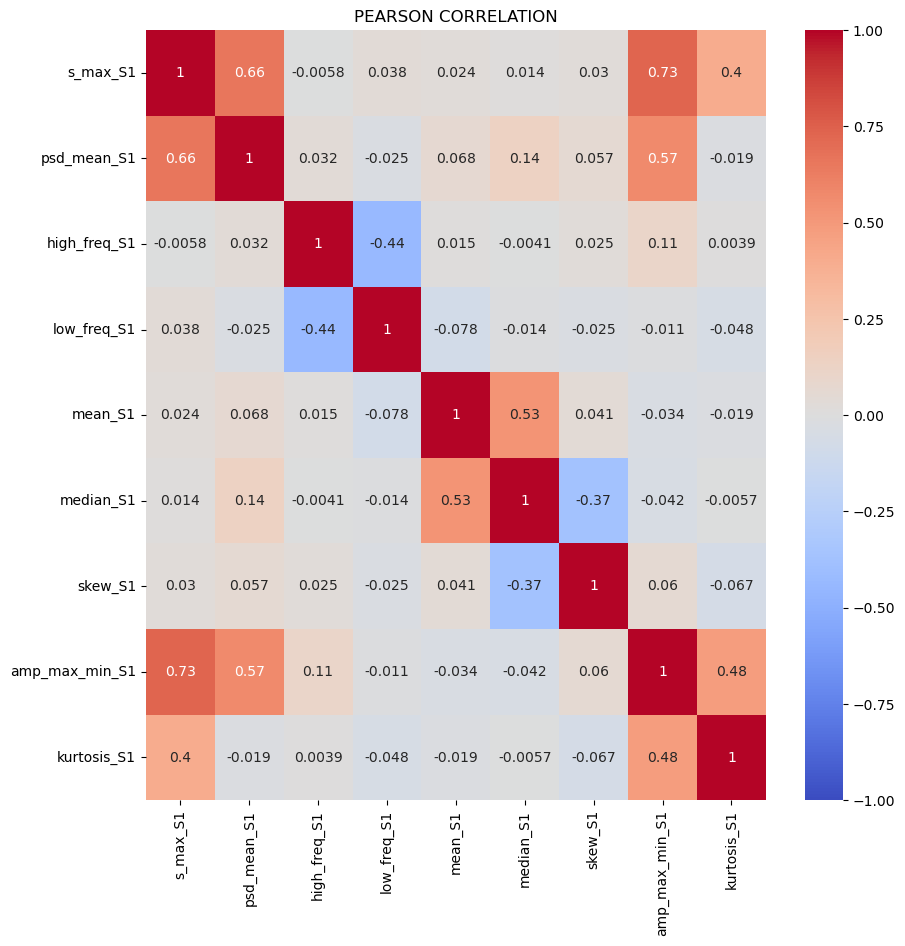

In [106]:
# ENCONTRANDO COVARIÂNCIAS LINEARES
plt.figure(figsize=(10,10))
plt.title("PEARSON CORRELATION")
sns.heatmap(df_1_S1_clean.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

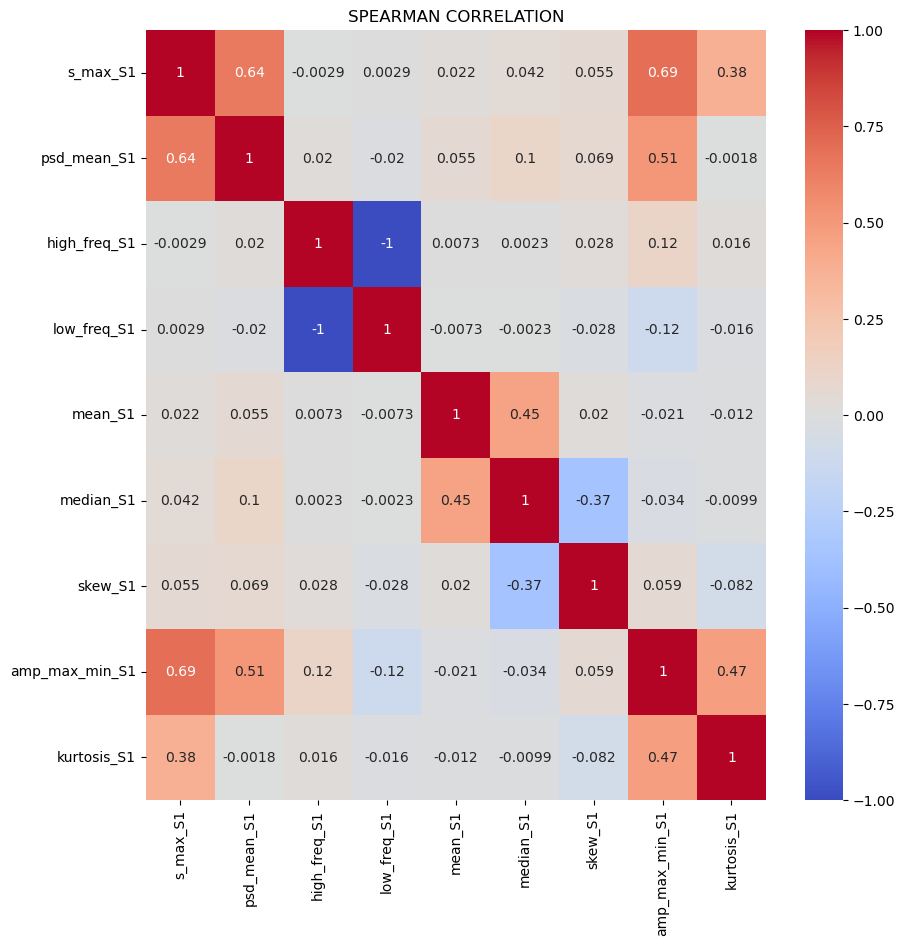

In [107]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS
plt.figure(figsize=(10,10))
plt.title("SPEARMAN CORRELATION")
sns.heatmap(df_1_S1_clean.corr(method= 'spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1);